In [1]:
x=1

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
adata = sc.read('../../../pipeline/data/multigrate_mil')
adata

AnnData object with n_obs × n_vars = 365712 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'latent_0', 'latent_1', 'latent_2', 'latent_3', 'latent_4'
    layers: 'counts'

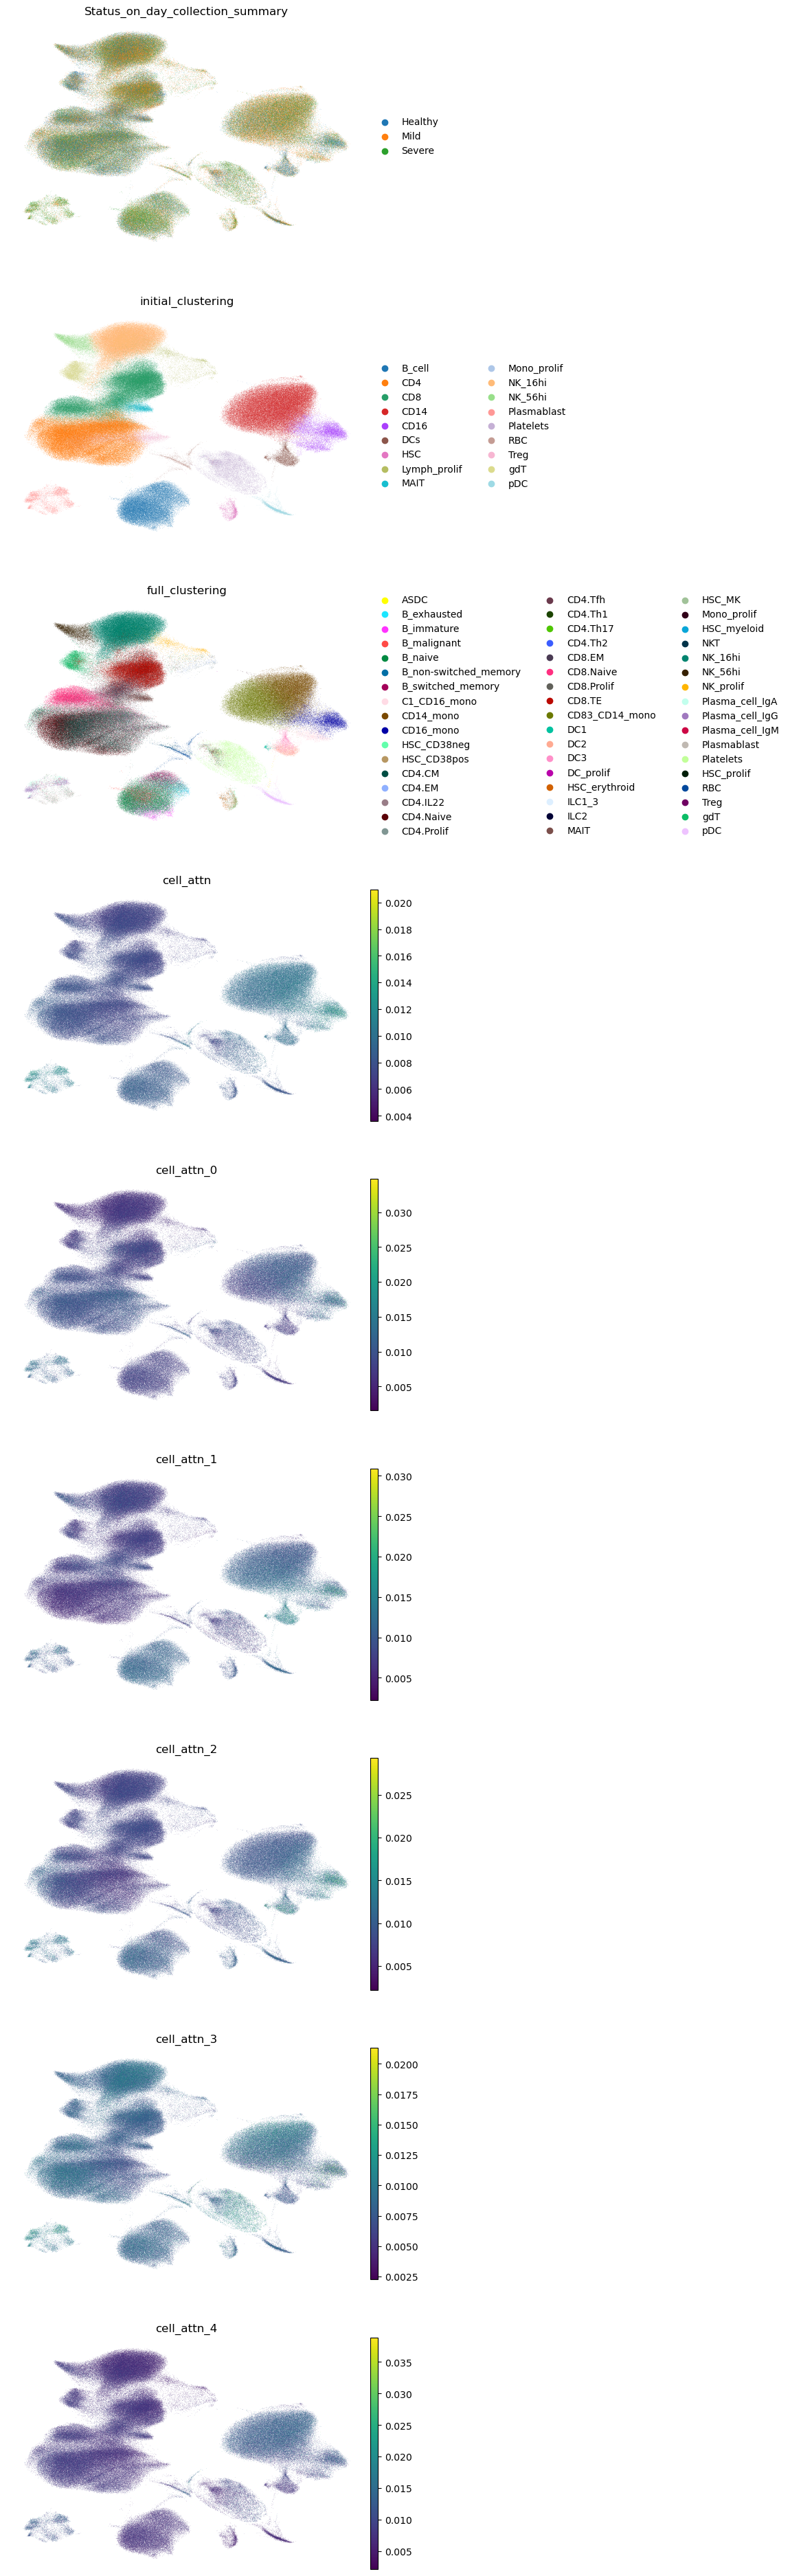

In [3]:
sc.pl.umap(
    adata,
    color=['Status_on_day_collection_summary', 'initial_clustering', 'full_clustering',
           'cell_attn', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4'],
    ncols=1,
    frameon=False
)

-------- Healthy -------


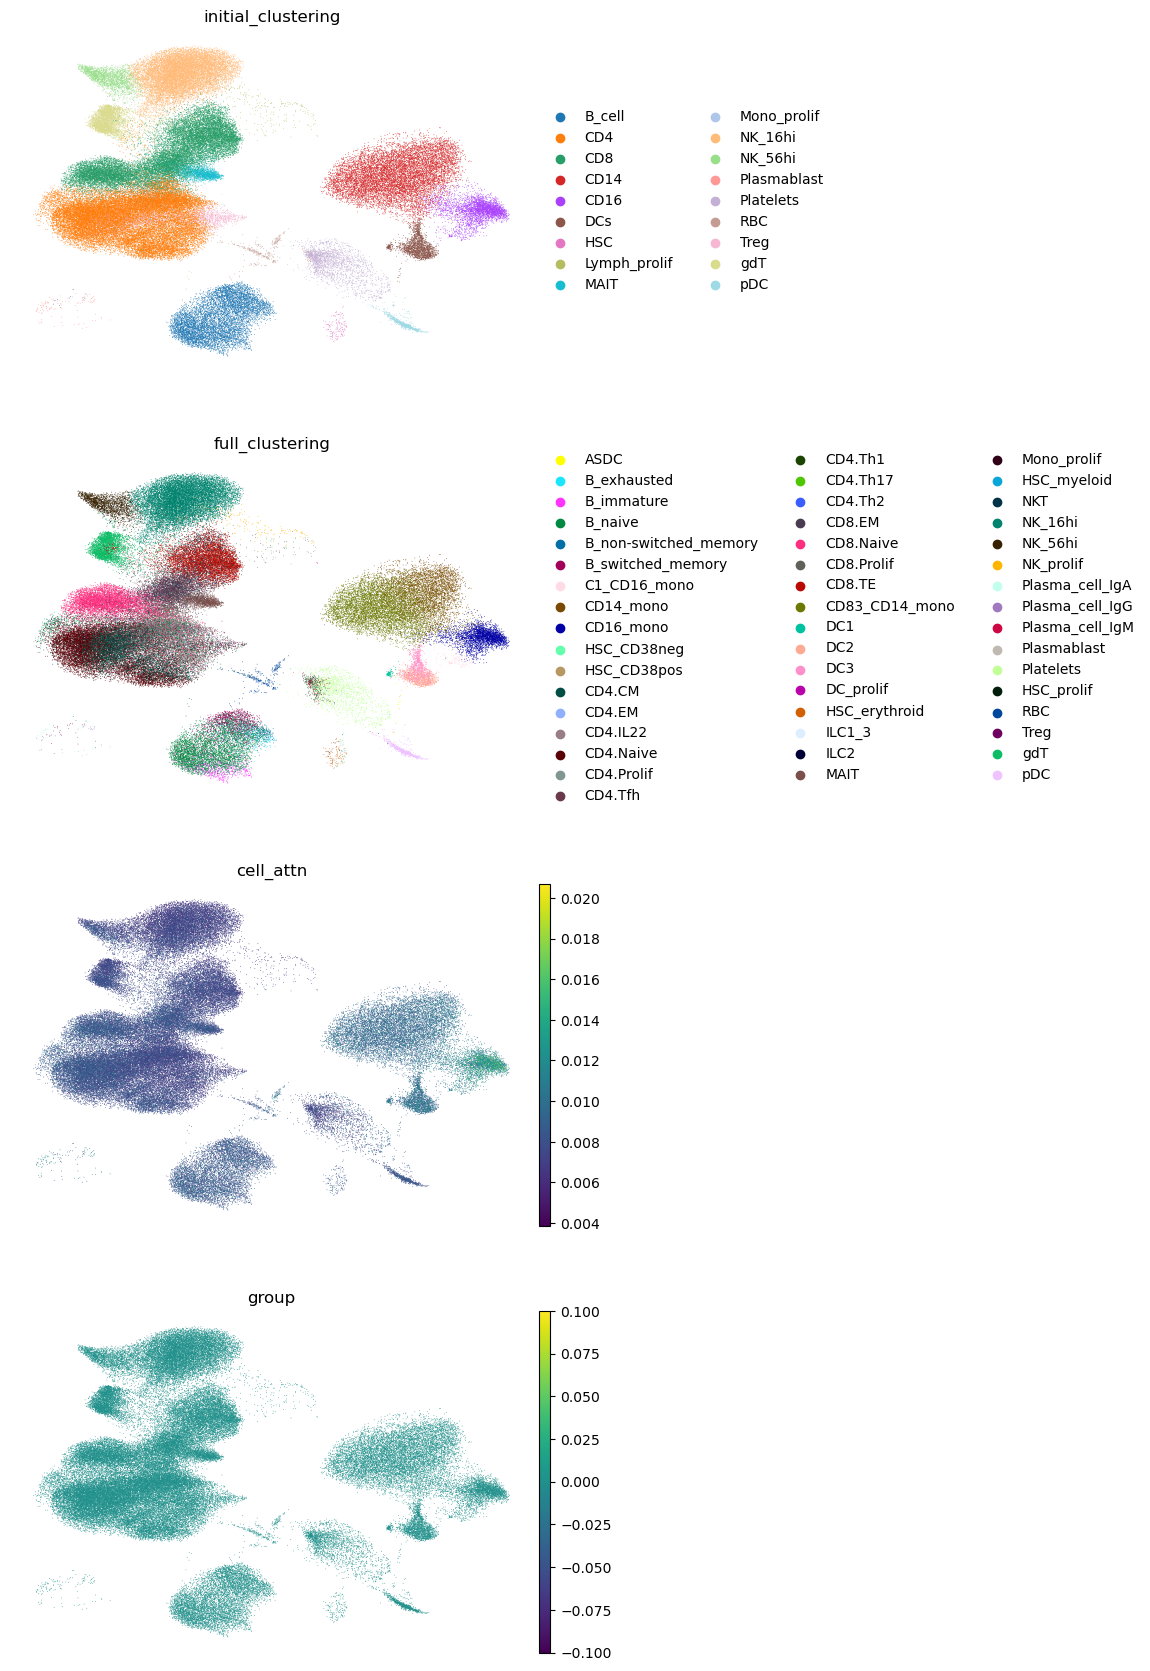

-------- Mild -------


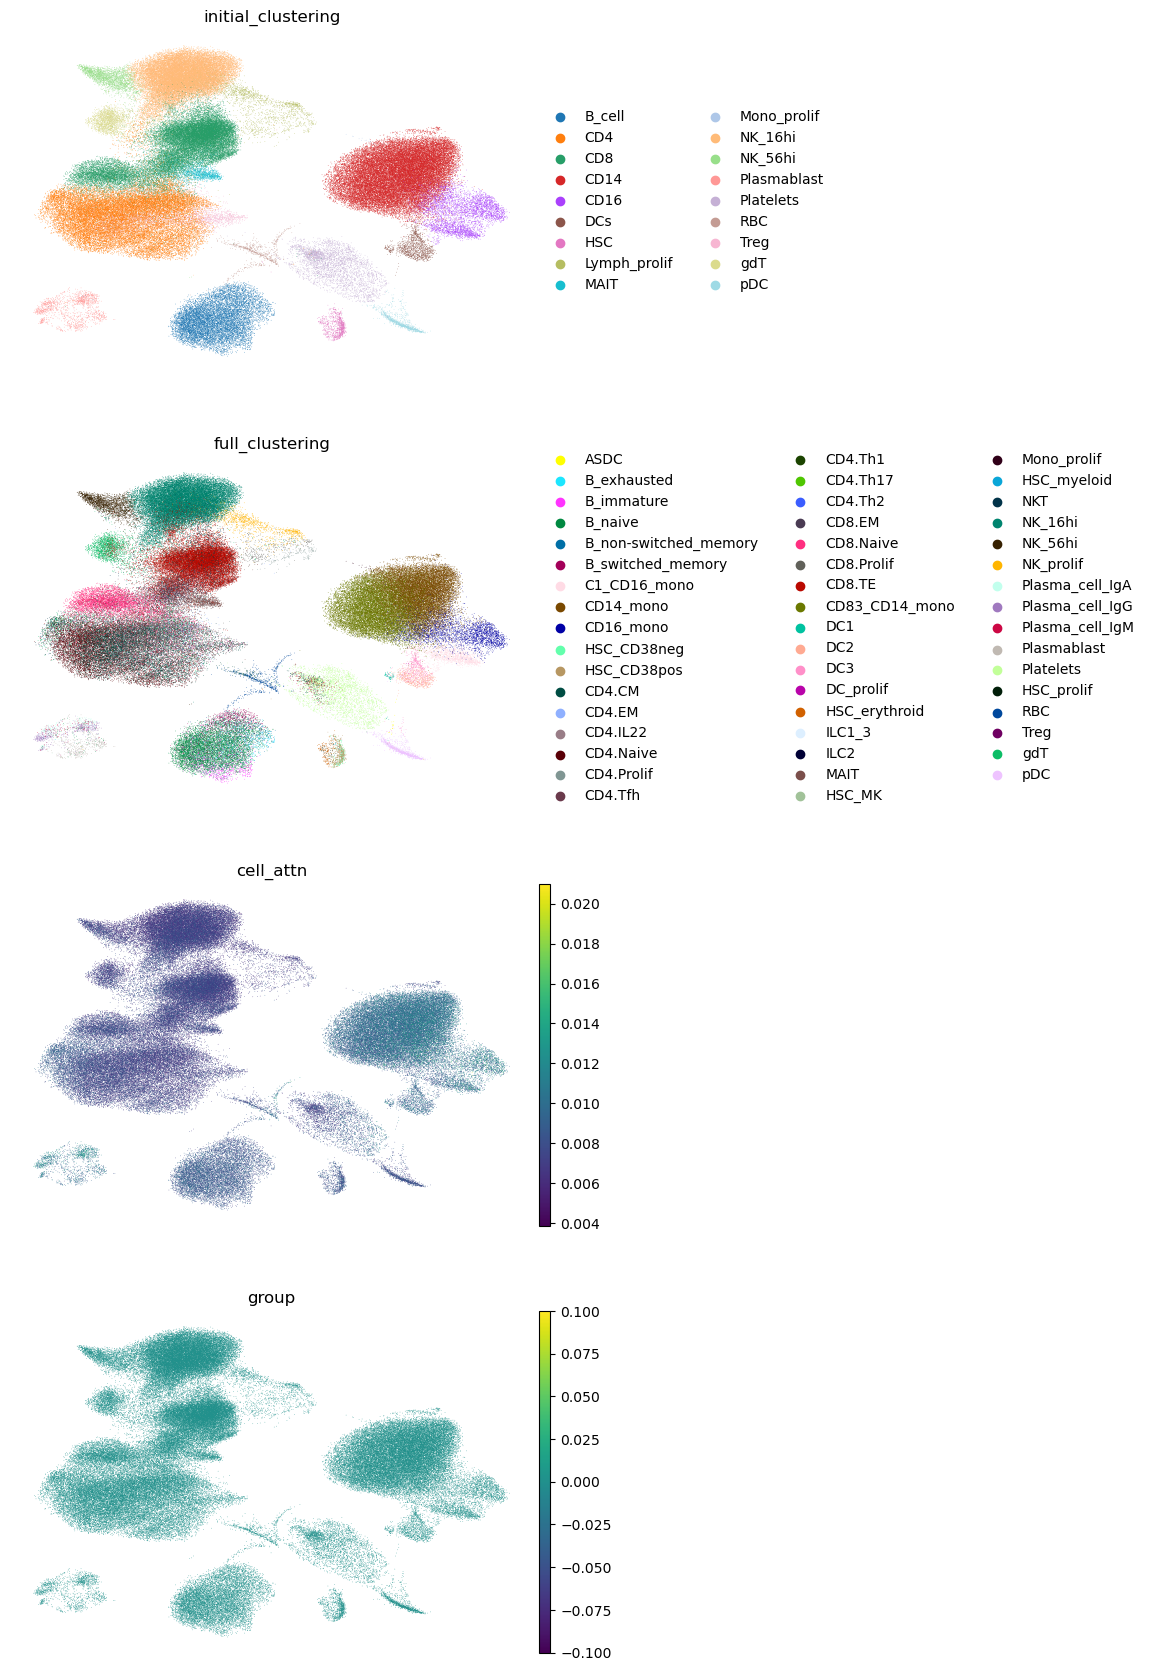

-------- Severe -------


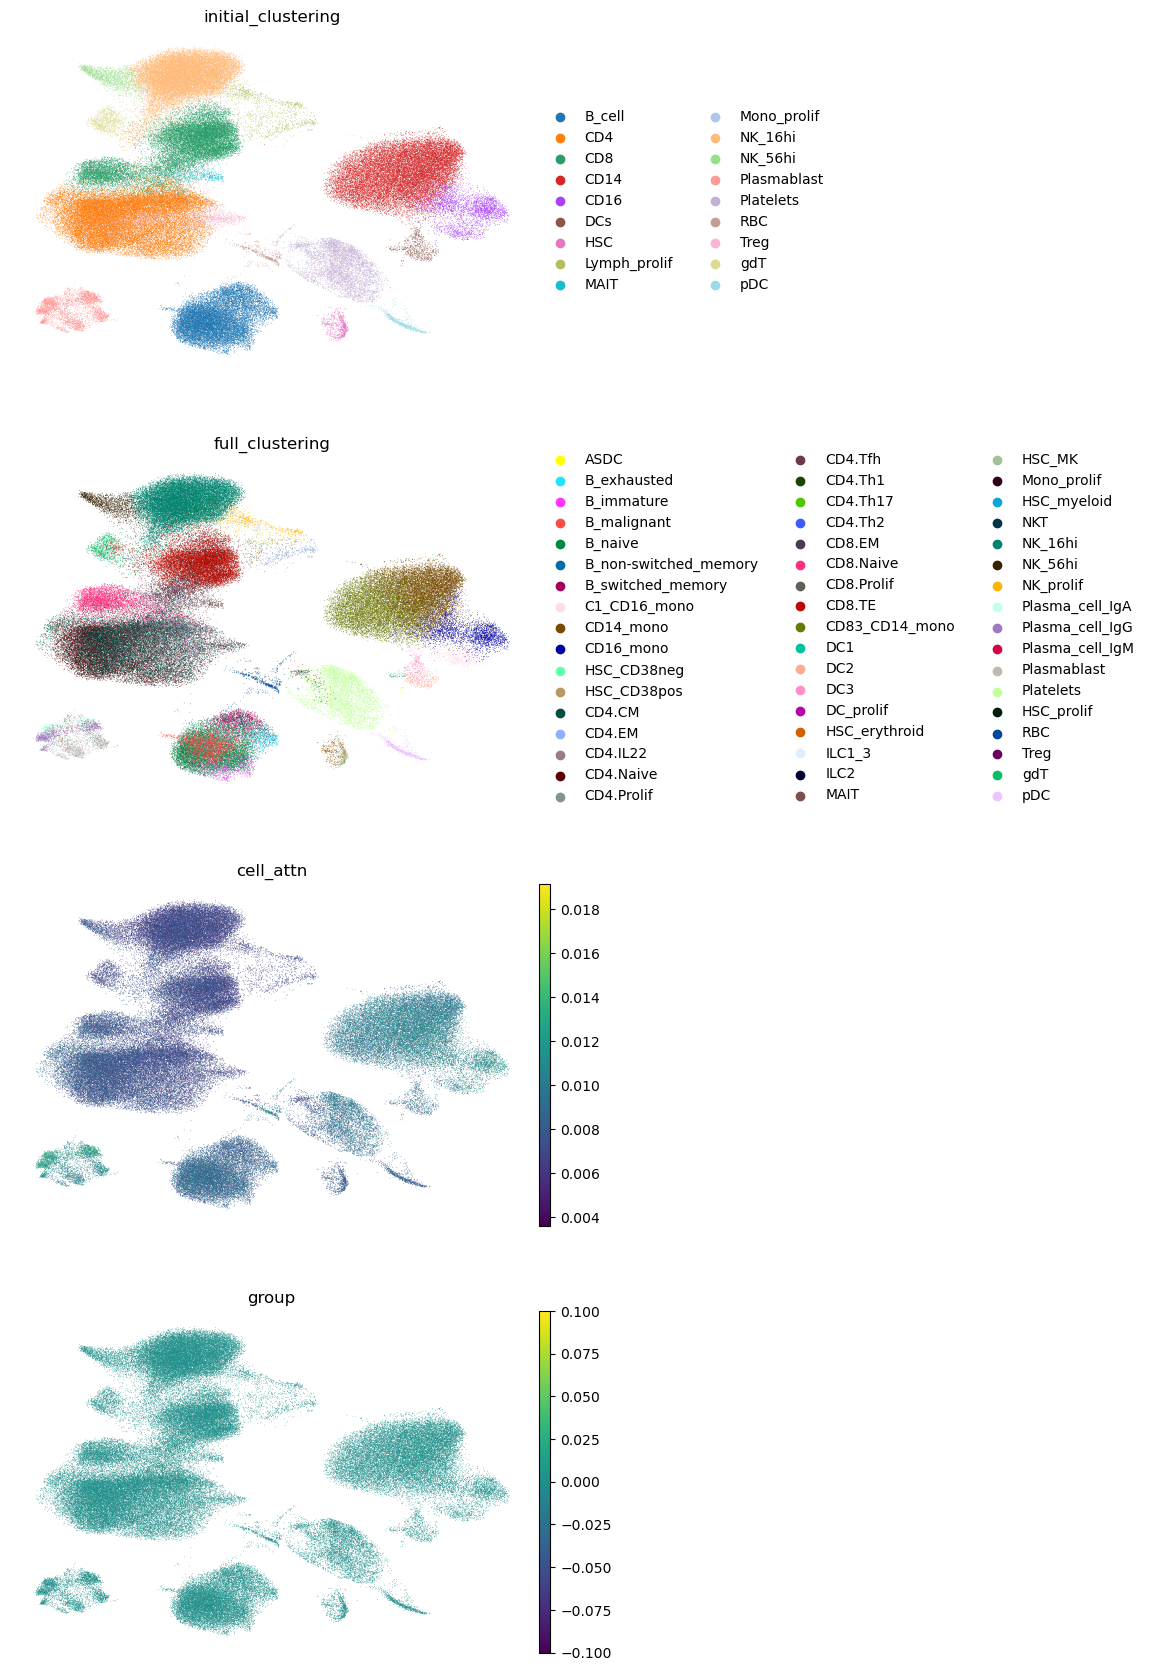

In [4]:
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    adata_tmp = adata[adata.obs['Status_on_day_collection_summary'] == cond].copy()
    print(f'-------- {cond} -------')
    sc.pl.umap(
        adata_tmp,
        color=['initial_clustering', 'full_clustering', 'cell_attn', 'group'],
        ncols=1,
        frameon=False
    )

In [5]:
dfs = []
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    adata_tmp = adata[adata.obs['Status_on_day_collection_summary'] == cond].copy()
    threshold_idx = int(len(adata_tmp) * 0.9)
    threshold_value = sorted(adata_tmp.obs['cell_attn'])[threshold_idx]
    adata_tmp.obs['group'] = 'all cells'
    adata_tmp.obs.loc[adata_tmp.obs['cell_attn'] >= threshold_value, 'group'] = 'top 10% cells'
    adata.obs[f'top_cells_{cond}'] = False
    adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, f'top_cells_{cond}'] = True
    adata.obs[f'top_cells_{cond}'] = adata.obs[f'top_cells_{cond}'].astype('category')
    dfs.append(adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs[['initial_clustering', 'Status_on_day_collection_summary']])

In [6]:
adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, 'top_cells_Severe']

covid_index
AAACCTGCATTTGCTT-MH9143320    True
AAACGGGAGGTGCTTT-MH9143320    True
AAACGGGGTCATCCCT-MH9143320    True
AAACGGGGTTAAGAAC-MH9143320    True
AAACGGGTCGGATGGA-MH9143320    True
                              ... 
BGCV15_GGCCGATTCGGTCTAA-1     True
BGCV15_GTTCTCGGTACCCAAT-1     True
BGCV15_TGCGGGTCAGGTGGAT-1     True
BGCV15_TGCTACCCAGTCAGAG-1     True
BGCV15_TGGTTCCTCTGCTGCT-1     True
Name: top_cells_Severe, Length: 12328, dtype: category
Categories (2, bool): [False, True]

In [7]:
np.sum(adata.obs['top_cells_Severe'] == True)

12328

In [8]:
adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, f'top_cells_{cond}']

covid_index
AAACCTGCATTTGCTT-MH9143320    True
AAACGGGAGGTGCTTT-MH9143320    True
AAACGGGGTCATCCCT-MH9143320    True
AAACGGGGTTAAGAAC-MH9143320    True
AAACGGGTCGGATGGA-MH9143320    True
                              ... 
BGCV15_GGCCGATTCGGTCTAA-1     True
BGCV15_GTTCTCGGTACCCAAT-1     True
BGCV15_TGCGGGTCAGGTGGAT-1     True
BGCV15_TGCTACCCAGTCAGAG-1     True
BGCV15_TGGTTCCTCTGCTGCT-1     True
Name: top_cells_Severe, Length: 12328, dtype: category
Categories (2, bool): [False, True]

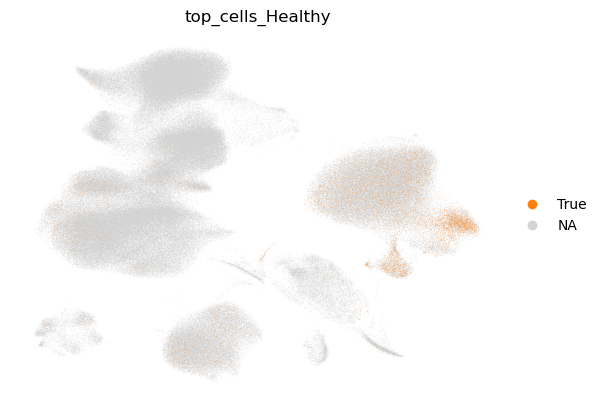

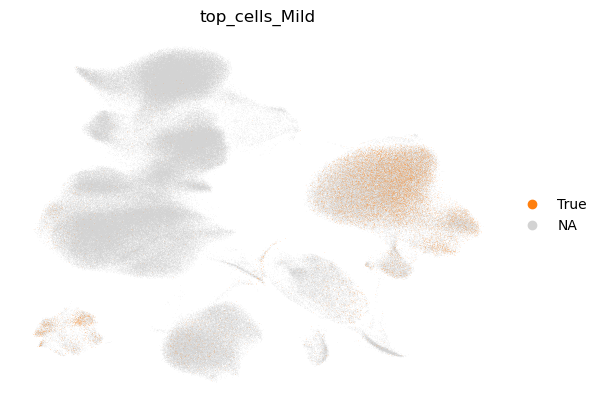

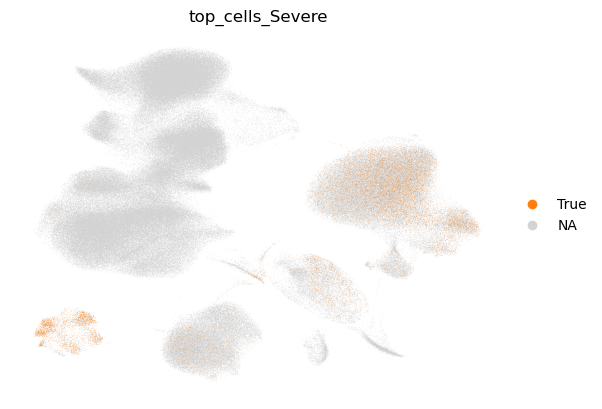

In [9]:
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    sc.pl.umap(adata, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

In [10]:
df = pd.concat(dfs)
df

initial_clustering  \
covid_index                                       
AAACGGGAGCACAGGT-newcastle65               CD14   
AAACGGGCATAGTAAG-newcastle65               CD14   
AAAGATGGTTAAGTAG-newcastle65               CD14   
AAAGCAAAGGGTCTCC-newcastle65                DCs   
AAAGCAAGTCTTGTCC-newcastle65               CD14   
...                                         ...   
BGCV15_GGCCGATTCGGTCTAA-1                  CD16   
BGCV15_GTTCTCGGTACCCAAT-1           Plasmablast   
BGCV15_TGCGGGTCAGGTGGAT-1                  CD14   
BGCV15_TGCTACCCAGTCAGAG-1                  CD14   
BGCV15_TGGTTCCTCTGCTGCT-1                  CD14   

                             Status_on_day_collection_summary  
covid_index                                                    
AAACGGGAGCACAGGT-newcastle65                          Healthy  
AAACGGGCATAGTAAG-newcastle65                          Healthy  
AAAGATGGTTAAGTAG-newcastle65                          Healthy  
AAAGCAAAGGGTCTCC-newcastle65                          Healthy  
AAAGCAAGTCTTGTCC-newcastle65                          Healthy  
...                                                       ...  
BGCV15_GGCCGATTCGGTCTAA-1                              Severe  
BGCV15_GTTCTCGGTACCCAAT-1                              Severe  
BGCV15_TGCGGGTCAGGTGGAT-1                              Severe  
BGCV15_TGCTACCCAGTCAGAG-1                              Severe  
BGCV15_TGGTTCCTCTGCTGCT-1                              Severe  

[36573 rows x 2 columns]

In [11]:
df_group = df.groupby('Status_on_day_collection_summary').value_counts(normalize=True).mul(100)
df_group

Status_on_day_collection_summary  initial_clustering
Healthy                           CD14                  38.540808
                                  CD16                  27.143446
                                  DCs                    8.852020
                                  B_cell                 8.357378
                                  CD4                    6.162407
                                  CD8                    4.462077
                                  Platelets              1.834295
                                  Plasmablast            0.762572
                                  RBC                    0.731657
                                  MAIT                   0.618302
                                  NK_16hi                0.587387
                                  Treg                   0.484336
                                  NK_56hi                0.474031
                                  gdT                    0.463726
                       

In [12]:
df_group = df_group.unstack().reindex(['Healthy', 'Mild', 'Severe'])

In [13]:
df_group

initial_clustering                  B_cell       CD14       CD16       CD4  \
Status_on_day_collection_summary                                             
Healthy                           8.357378  38.540808  27.143446  6.162407   
Mild                              3.637989  67.044908  13.644179  1.959975   
Severe                            6.773199  50.024335  13.270604  1.289747   

initial_clustering                     CD8       DCs       HSC  Lymph_prolif  \
Status_on_day_collection_summary                                               
Healthy                           4.462077  8.852020  0.206101      0.041220   
Mild                              0.715219  2.303831  0.323224      0.020631   
Severe                            0.381246  1.232966  0.170344      0.040558   

initial_clustering                    MAIT  Mono_prolif   NK_16hi   NK_56hi  \
Status_on_day_collection_summary                                              
Healthy                           0.618302          NaN  0.587387  0.474031   
Mild                              0.048140     0.061894  0.288838  0.110034   
Severe                            0.016223     0.235237  0.064893  0.032446   

initial_clustering                Plasmablast  Platelets       RBC      Treg  \
Status_on_day_collection_summary                                               
Healthy                              0.762572   1.834295  0.731657  0.484336   
Mild                                 6.354446   2.296953  0.715219  0.185682   
Severe                              18.429591   6.854315  1.030175  0.056781   

initial_clustering                     gdT       pDC  
Status_on_day_collection_summary                      
Healthy                           0.463726  0.278236  
Mild                              0.082525  0.206313  
Severe                            0.008112  0.089228

In [14]:
color = []
for ct in df_group.columns:
    idx = list(adata.obs['initial_clustering'].cat.categories).index(ct)
    color.append(adata.uns['initial_clustering_colors'][idx])
len(color)

18

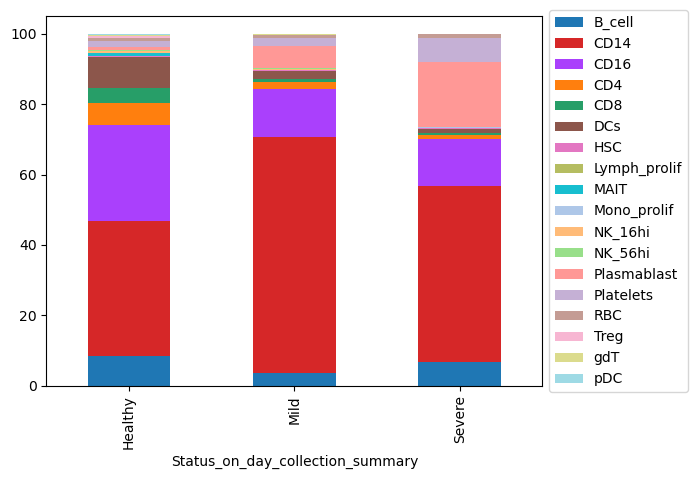

In [15]:
df_group.plot.bar(stacked=True, color=color).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [16]:
mono = adata[adata.obs['initial_clustering'] == 'CD14'].copy()
mono

AnnData object with n_obs × n_vars = 61930 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn', 'top_cells_Healthy', 'top_cells_Mild', 'top_cells_Severe'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap', 'Status_on_day_collection_summary_colors', 'initial_clustering_colors', 'full_clustering_colors', 'top_cells_Healthy_colors',

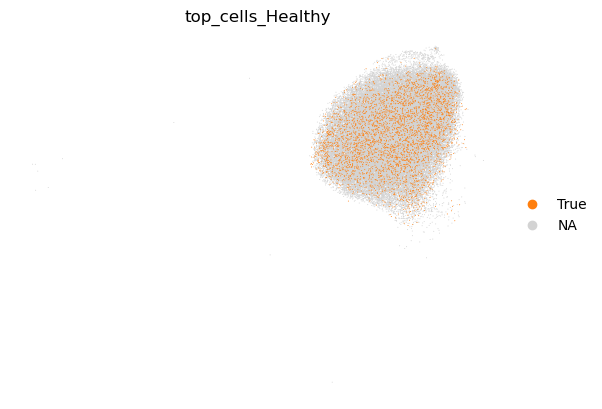

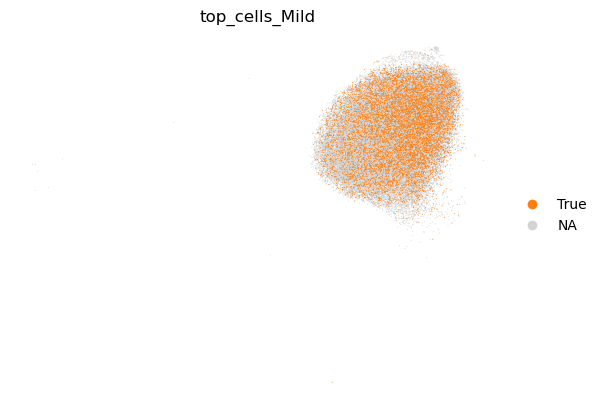

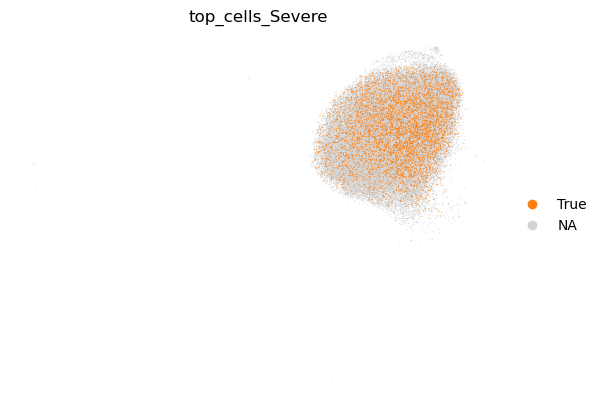

In [17]:
for cond in np.unique(mono.obs['Status_on_day_collection_summary']):
    sc.pl.umap(mono, color=[f'top_cells_{cond}'], groups=[True], frameon=False)